# Análisis de ventas de vehículos de segunda mano

Para nuestro proyecto, decidimos hacer un análisis de los datos de anuncios de ventas de autos usados en toda España publicados en las principales plataformas. 

## Importando las librerias necesarias para el análisis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import plotly.express as px

In [10]:
df = pd.read_csv('coches-de-segunda-mano-sample.csv')
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


# Preprocesamiento
Primero, eliminamos las columnas **url**, **company** y **country** para optimizar el cálculo y reducir el uso de memoria. Esta decisión se tomó porque dichas columnas no se consideran relevantes para el análisis.

In [11]:
df.drop(columns=['url', 'company', 'country'], inplace=True)
df.head()

,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,publish_date,insert_date
0,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,NaN,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,2020-12-18 10:47:13,2021-01-15 00:00:00
1,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,82.0,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,2021-01-02 11:25:40,2021-01-15 00:00:00
2,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,100.0,4,Manual,Blanco,10,True,Auto 96,Barcelona,2020-12-16 10:51:45,2021-01-15 00:00:00
3,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,140.0,4,Manual,Blanco,9,True,Inniauto,Navarra,2020-11-25 11:09:14,2021-01-15 00:00:00
4,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,130.0,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,2021-01-12 20:00:34,2021-01-15 00:00:00


## Cálculo del precio medio de venta por cada marca en la muestra

Es relevante para el análisis calcular el precio medio de venta de cada marca de coches, con el objetivo de obtener una visión más precisa sobre cuáles son las marcas más costosas y las más económicas en el mercado de coches de segunda mano, kilómetro cero y seminuevos. 

In [12]:
df2 = df.groupby('make')['price'].mean()
df2a = df2.reset_index()
df2a.columns = ['marca', 'precio_medio']

In [6]:
df2a.head()

,marca,precio_medio
0,ABARTH,19098.333333
1,ALFA ROMEO,13815.427152
2,ALPINE,66000.000000
3,ARO,1000.000000
4,ASTON MARTIN,89578.666667


In [7]:
# Ordenar el DataFrame por 'precio_medio' de mayor a menor
df2a_sorted = df2a.sort_values(by='precio_medio', ascending=False)

# Crear el gráfico con los datos ordenados
fig = px.bar(
    df2a_sorted[38:],
    x='marca',
    y='precio_medio',
    title="Precio medio de venta de vehículos de segunda mano en España según la marca: los más baratos",
    labels={'marca': 'Marca', 'precio_medio': 'Precio Medio (€)'},
    text='precio_medio',  # Mostrar valores en las barras
    color='precio_medio',  # Usar un gradiente de color basado en el precio
    color_continuous_scale='Blues'  # Escala de color
)

# Ajustar diseño del gráfico
fig.update_traces(texttemplate='%{text:.2f} €', textposition='outside')  # Formato de valores
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis_tickangle=45,  # Rotar etiquetas del eje X
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    coloraxis_showscale=False,  # Ocultar barra de escala de color
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(255,255,255,1)',  # Fondo blanco
    margin=dict(t=50, b=120)  # Ajustar márgenes
)

# Mostrar el gráfico
fig.show()

fig = px.bar(
    df2a_sorted[:38],
    x='marca',
    y='precio_medio',
    title="Precio medio de venta de vehículos de segunda mano en España según la marca: los más caros",
    labels={'marca': 'Marca', 'precio_medio': 'Precio Medio (€)'},
    text='precio_medio',  # Mostrar valores en las barras
    color='precio_medio',  # Usar un gradiente de color basado en el precio
    color_continuous_scale='Blues'  # Escala de color
)

# Ajustar diseño del gráfico
fig.update_traces(texttemplate='%{text:.2f} €', textposition='outside')  # Formato de valores
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    xaxis_tickangle=45,  # Rotar etiquetas del eje X
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    coloraxis_showscale=False,  # Ocultar barra de escala de color
    plot_bgcolor='rgba(0,0,0,0)',  # Fondo transparente
    paper_bgcolor='rgba(255,255,255,1)',  # Fondo blanco
    margin=dict(t=50, b=120)  # Ajustar márgenes
)

# Mostrar el gráfico
fig.show()

## Provincias Líderes en Adopción de Vehículos Eléctricos

Se considera igualmente importante para el análisis conocer el porcentaje de vehículos eléctricos en comparación con el total de vehículos vendidos por provincia. Esto permitirá identificar las provincias que están mostrando una mayor adopción de la compra de coches eléctricos de segunda mano.

In [15]:
# Filtrar los vehículos eléctricos
electric_cars = df[df['fuel'] == 'Eléctrico']
electric_cars.head()

,make,model,version,price,price_financed,fuel,year,kms,power,doors,shift,color,photos,is_professional,dealer,province,publish_date,insert_date
73,BMW,i3,BMW i3 5p.,15500,12900.0,Eléctrico,2016.0,49000,170.0,5,Automático,Blanco (blanco-negro),28,True,AUTOMOVILES YUMACAR S.L,Madrid,2020-12-20 19:37:42,2021-01-15 00:00:00
117,SMART,fortwo,SMART fortwo 60kW81CV EQ coupe 3p.,14500,14500.0,Eléctrico,2019.0,2000,82.0,3,Automático,Rojo,21,True,Automoviles 10 - Especialistas en Smart,Madrid,2020-12-30 05:23:08,2021-01-15 00:00:00
408,PEUGEOT,Partner,PEUGEOT Partner Furgon Confort Electric L1,23500,18500.0,Eléctrico,2020.0,10,67.0,3,Automático,Blanco,22,True,PSA Retail Orense,Orense,2021-01-14 16:56:46,2021-01-15 00:00:00
532,SMART,fortwo,SMART fortwo 60kW81CV EQ coupe 3p.,26920,25950.0,Eléctrico,2020.0,1,82.0,3,Automático,Negro,21,True,Citycar Sur,Madrid,2020-12-24 17:47:29,2021-01-15 00:00:00
630,DS,DS 3 Crossback E-Tense,DS DS 3 Crossback ETense 50 kWh Performance Li...,38102,37402.0,Eléctrico,2021.0,1,136.0,5,Automático,Gris / Plata,4,True,MAAS EXCLUSIVAS PONT,Barcelona,2021-01-14 12:25:00,2021-01-15 00:00:00


In [16]:
# Calcular el total de vehículos y los eléctricos por provincia
total_by_province = df['province'].value_counts()
total_by_province.head()

province
Madrid       9638
Barcelona    5856
Valencia     3533
Sevilla      2552
Málaga       2303
Name: count, dtype: int64

In [17]:
electric_by_province = electric_cars['province'].value_counts()
electric_by_province.head()

province
Madrid       150
Barcelona     72
Valencia      33
Vizcaya       21
Málaga        16
Name: count, dtype: int64

In [18]:
# Crear el DataFrame con los datos procesados
province_analysis = pd.DataFrame({
    'Total Vehicles': total_by_province,
    'Electric Vehicles': electric_by_province,
    'Percentage Electric': electric_by_province / total_by_province
    
})

# Rellenar valores faltantes y calcular el porcentaje
province_analysis['Electric Vehicles'] = province_analysis['Electric Vehicles'].fillna(0)
province_analysis['Percentage Electric'] = (
    province_analysis['Electric Vehicles'] / province_analysis['Total Vehicles'] * 100
)

province_analysis.head()

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
A Coruña,993,11.0,1.107754
Albacete,375,3.0,0.800000
Alicante,2103,13.0,0.618165
Almería,481,2.0,0.415800
Asturias,864,14.0,1.620370


In [12]:
# Top 10 Provincias con mayor Porcentaje de Vehículos Eléctricos 
top_provinces = province_analysis.sort_values('Percentage Electric', ascending=False).head(10)
top_provinces

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
Segovia,120,5.0,4.166667
Zamora,121,5.0,4.132231
Álava,409,10.0,2.444988
Soria,53,1.0,1.886792
Burgos,487,9.0,1.848049
Cáceres,326,6.0,1.840491
Orense,237,4.0,1.687764
Asturias,864,14.0,1.620370
Toledo,705,11.0,1.560284


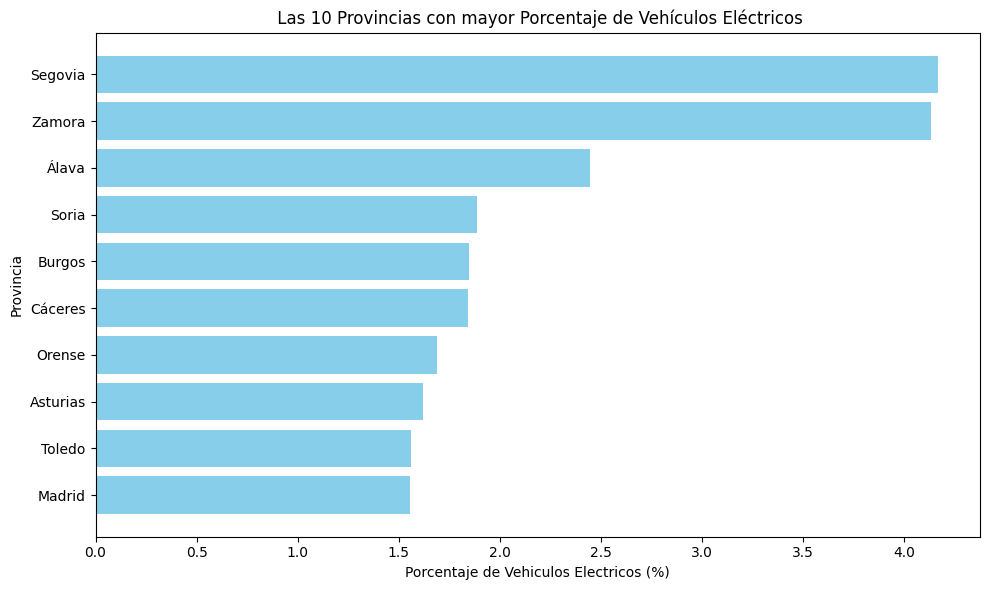

In [13]:
# Grafico de Barras
plt.figure(figsize=(10, 6))
plt.barh(top_provinces.index, top_provinces['Percentage Electric'], color='skyblue')
plt.xlabel('Porcentaje de Vehiculos Electricos (%)')
plt.ylabel('Provincia')
plt.title(' Las 10 Provincias con mayor Porcentaje de Vehículos Eléctricos')
plt.gca().invert_yaxis()  # Invert eje y para mejor legibilidad
plt.tight_layout()
plt.show()

Como se puede observar el porcentaje de vehiculos electricos por provincia es sumamente pequeño lo cual estaria indicando que España al menos hasta donde esta recogida la data no tenia una buena adopcion de compra de coches electricos de segunda mano. 

### Distribución de Vehículos Eléctricos 

Para complementar lo mencionado anteriormente, es igualmente relevante analizar la distribución de coches eléctricos en las 10 provincias con el mayor porcentaje de vehículos eléctricos de segunda mano comprados.

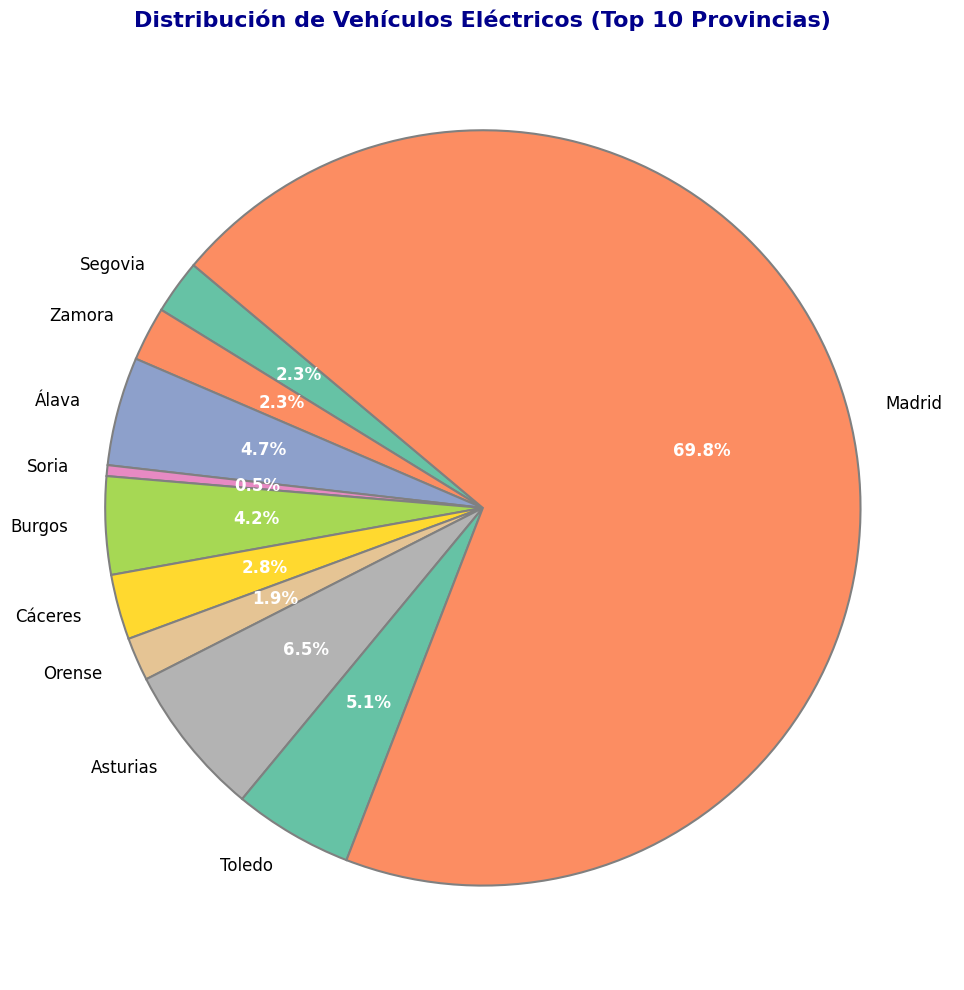

In [14]:
# Configuración del tamaño del gráfico para hacerlo más grande y visible
plt.figure(figsize=(10, 10))

# Crear el gráfico de pastel
# 'autopct' muestra el porcentaje en cada porción, 'startangle' rota el gráfico para empezar desde un ángulo específico
# 'colors' asigna una paleta de colores predefinida
wedges, texts, autotexts = plt.pie(
    top_provinces['Electric Vehicles'],
    labels=top_provinces.index,
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=140,  # Rotar el gráfico para que la primera porción empiece desde el ángulo 140
    colors=plt.cm.Set2.colors,  # Se utiliza una paleta de colores más suave y profesional
    textprops={'fontsize': 12, 'color': 'black'},  # Ajuste del tamaño y color de las etiquetas
    wedgeprops={'edgecolor': 'gray', 'linewidth': 1.5}  # Definir bordes gris claros para cada porción
)

# Personalización de los textos dentro del gráfico para que sean más visibles
for autotext in autotexts:
    autotext.set_color('white')  # El texto dentro de las porciones se pone en blanco para mayor contraste
    autotext.set_fontweight('bold')  # El texto dentro de las porciones se pone en negrita para resaltar

# Título del gráfico con formato más destacado
plt.title('Distribución de Vehículos Eléctricos (Top 10 Provincias)', fontsize=16, fontweight='bold', color='darkblue')

# Ajuste del diseño para evitar recortes del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Como se puede observar en el gráfico anterior, Madrid destaca en comparación con el resto por tener el mayor porcentaje basado en la cantidad de coches eléctricos vendidos. Sin embargo, en el apartado anterior se señaló que no era una de las provincias con el mayor porcentaje de vehículos eléctricos en relación con el total de coches por provincia. Ahora queda saber como es la distribución de vehículos eléctricos en las 10 provincias con mayor cantidad de los mismos.

In [19]:
# Top 10 Provincias con mayor cantidad de Vehículos Eléctricos 
top_provinces2 = province_analysis.sort_values('Electric Vehicles', ascending=False).head(10)
top_provinces2

,Total Vehicles,Electric Vehicles,Percentage Electric
province,,,
Madrid,9638,150.0,1.556339
Barcelona,5856,72.0,1.229508
Valencia,3533,33.0,0.934050
Vizcaya,1392,21.0,1.508621
Málaga,2303,16.0,0.694746
Murcia,1364,15.0,1.099707
Sevilla,2552,14.0,0.548589
Zaragoza,1055,14.0,1.327014
Asturias,864,14.0,1.620370


Como se puede observar en la tabla anterior los que tienen mayor cantidad de Vehículos Eléctricos  son las provincias de Madrid y Barcelona por mucho. Lo cual se puede observar en el siguiente grafico: 

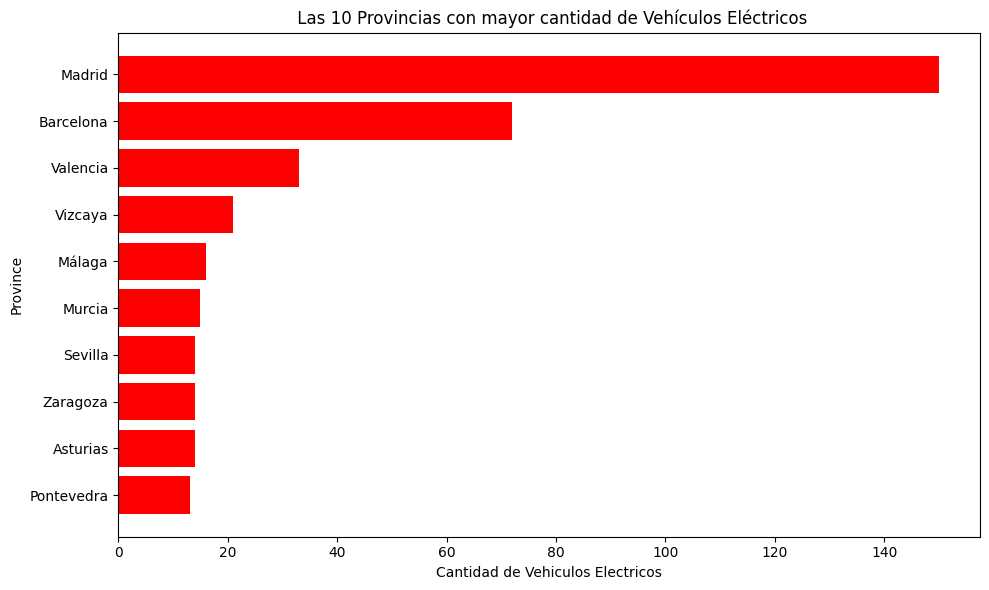

In [20]:
# Grafico de Barras
plt.figure(figsize=(10, 6))
plt.barh(top_provinces2.index, top_provinces2['Electric Vehicles'], color='red')
plt.xlabel('Cantidad de Vehiculos Electricos')
plt.ylabel('Province')
plt.title(' Las 10 Provincias con mayor cantidad de Vehículos Eléctricos')
plt.gca().invert_yaxis()  # Invert eje y para mejor legibilidad
plt.tight_layout()
plt.show()

Ahora con esto, surge la pregunta: ¿Cuánto representan las provincias de Madrid y la de Barcelona a la cantidad total de Vehículos Eléctricos  que hay en cada una de las 10 provincias?

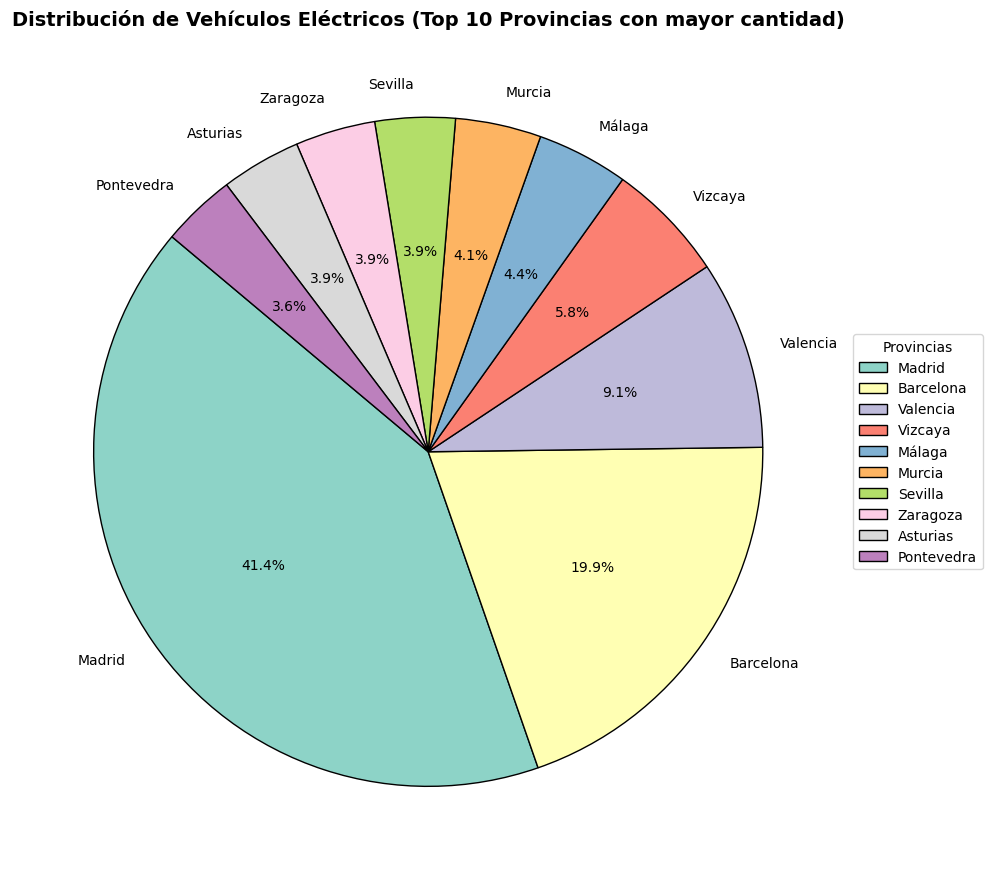

In [21]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Crear un array para resaltar las porciones más significativas (por ejemplo, la mayor porción)
explode = [0.1 if i == top_provinces2['Electric Vehicles'].idxmax() else 0 for i in range(len(top_provinces2))]

# Crear el gráfico de pastel
wedges, texts, autotexts = plt.pie(
    top_provinces2['Electric Vehicles'],
    labels=top_provinces2.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=plt.cm.Set3.colors,  # Paleta de colores atractiva
    textprops={'fontsize': 10},  # Tamaño de fuente más legible
    wedgeprops={'edgecolor': 'black'}  # Bordes para mayor definición
)

# Agregar título
plt.title('Distribución de Vehículos Eléctricos (Top 10 Provincias con mayor cantidad)', fontsize=14, weight='bold')

# Añadir una leyenda fuera del gráfico
plt.legend(
    wedges, top_provinces2.index,
    title="Provincias",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Mejorar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede apreciar que Madrid junto con Barcelona abarcan un 61.3% de la cantidad de Vehículos Eléctricos de las 10 provincias con mayor numero de Vehículos Eléctricos. 

## Cálculo del porcentaje de vehiculos en venta segun su tipo de combustible

Resulta fundamental para el estudio analizar cómo se distribuyen los diferentes tipos de automóviles según su tipo de combustible en el mercado de vehículos de segunda mano, con el fin de comprender su volumen y participación en este ámbito.

In [22]:
# Leer el dataset nuevamente (el original)
df = pd.read_csv('coches-de-segunda-mano-sample.csv')

# Calcular el número de vehículos por tipo de combustible
fuel_cuenta = df['fuel'].value_counts()

# Calcular el porcentaje de vehículos por tipo de combustible
fuel_porcentajes = (fuel_cuenta / fuel_cuenta.sum()) * 100

# Crear un DataFrame para los porcentajes
fuel_porcentajes_df = fuel_porcentajes.reset_index()
fuel_porcentajes_df.columns = ['fuel', 'porcentaje']

# Mostrar el DataFrame
fuel_porcentajes_df.head()

,fuel,porcentaje
0,Diésel,61.788846
1,Gasolina,33.308644
2,Híbrido,2.350162
3,Eléctrico,1.117028
4,Híbrido enchufable,1.024943


In [23]:
# Crear el gráfico de pastel
fig = px.pie(fuel_porcentajes_df, 
            values='porcentaje',  # Los valores que determinarán el tamaño de las porciones
            names='fuel',  # Las categorías que serán mostradas como etiquetas
            title='Distribución de vehículos en venta según tipo de combustible',  # Título descriptivo
            color='fuel',  # Colores asignados a cada categoría (combustible)
            color_discrete_map={'Eléctrico': 'green', 'Gasolina': 'red', 'Diésel': 'blue', 'CNG': 'orange'},  # Colores personalizados
            hole=0.3)  # Hacer el gráfico tipo donut para hacerlo más estético

# Agregar detalles al gráfico
fig.update_traces(textinfo='percent+label',  # Mostrar tanto el porcentaje como la etiqueta
                pull=[0.1, 0, 0, 0],  # Resaltar la categoría "Eléctrico" (por ejemplo) por medio de la opción "pull"
                textfont_size=15)  # Ajustar el tamaño del texto para mayor legibilidad

# Personalizar el diseño para hacerlo más atractivo
fig.update_layout(
    title_font_size=18,  # Tamaño de fuente más grande para el título
    title_font_color='darkblue',  # Color del título para mayor contraste
    margin=dict(t=50, b=50, l=50, r=50)  # Ajuste de márgenes para evitar que el gráfico se corte
)

# Mostrar el gráfico
fig.show()


En este gráfico se evidencia que, en el mercado de venta de segunda mano, los automóviles con combustible diésel predominan, mientras que los que utilizan gas natural (CNG) representan una minoría. Este análisis puede servir como punto de partida para comprender las preferencias del mercado respecto a los tipos de vehículos más demandados.

## Top 10 modelos con mayor número de coches en venta en las plataformas de coches de segunda mano.

Es relevante tambien, a su vez, analizar los marcas de autos usados mas vendidas.

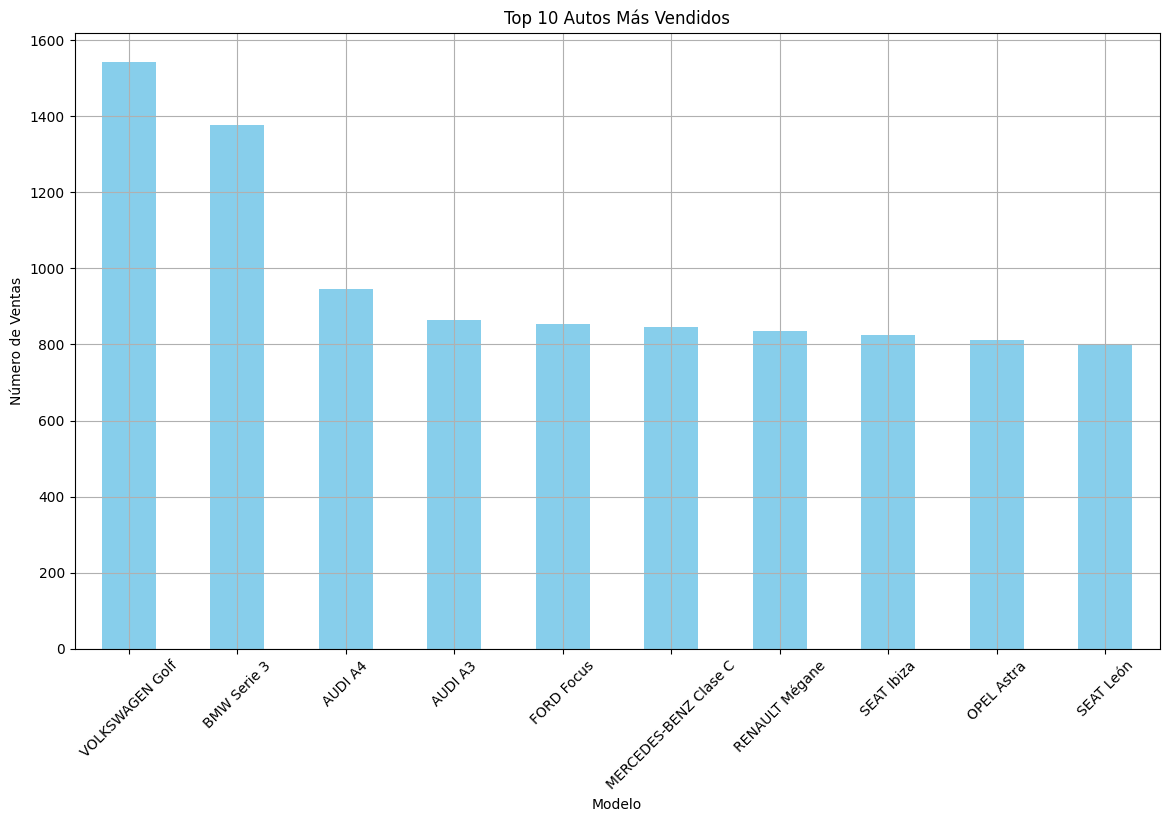

In [21]:
df['ModeloCompleto'] = df['make'] + ' ' + df['model']

# Contar las ventas por modelo completo
ventas_por_modelo = df['ModeloCompleto'].value_counts().head(10)

# Configuración de la gráfica
plt.figure(figsize=(14, 8))
ventas_por_modelo.plot(kind='bar', color='skyblue')

plt.xlabel('Modelo')
plt.ylabel('Número de Ventas')
plt.title('Top 10 Autos Más Vendidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Tendencias de ventas de autos usados a lo largo de los años.

En este apartado del análisis, se busca examinar cómo han evolucionado las preferencias de los usuarios hacia distintas marcas de vehículos a lo largo del tiempo. Para ello, se toma como indicador la fecha media de fabricación de los coches, lo que permite identificar patrones y cambios en las preferencias del mercado a medida que avanzan los años.

In [22]:
fecha_media_por_marca = df.groupby('make')['year'].mean().reset_index()
fecha_media_por_marca.columns = ['marca', 'fecha_media']

fig = px.bar(fecha_media_por_marca,x="marca", y="fecha_media", title="Fecha media de fabricacion por marca")
fig.update_yaxes(range=[1990, 2025], title='Fecha Media de Fabricación')


# Mostrar el gráfico
fig.show()



En conclusión el análisis de la fecha media de fabricación de los vehículos por marca puede proporcionar una visión clara de cómo las preferencias de los usuarios hacia diferentes marcas de coches han evolucionado a lo largo del tiempo. Esta información es valiosa para fabricantes, concesionarios y vendedores de coches de segunda mano, ya que les permite entender mejor las tendencias del mercado y adaptar sus estrategias en consecuencia.

# Conclusión

El análisis de los datos de anuncios de ventas de vehículos de segunda mano en España revela una serie de tendencias y patrones significativos. En primer lugar, se observa una amplia variabilidad en los precios medios de venta por marca. Por ejemplo, marcas de lujo como Lamborghini, Ferrari y Bentley mantienen precios significativamente más altos en comparación con marcas más económicas como ARO, VAZ y DAEWOO. Esto subraya la importancia de la marca en la determinación del valor en el mercado de segunda mano.

Además, en cuanto a la adopción de vehículos eléctricos, se evidencia una variabilidad considerable entre las provincias. Por ejemplo, provincias como Segovia y Zamora lideran en términos de porcentaje de vehículos eléctricos en comparación con el total de vehículos vendidos. Esto indica que ciertas regiones están más avanzadas en la transición hacia vehículos eléctricos, posiblemente debido a políticas gubernamentales, incentivos o mayor conciencia ambiental.

Por otro lado, la marca del vehículo sigue siendo un factor crucial en su valor en el mercado de segunda mano. Las marcas de prestigio, como se mencionó anteriormente, mantienen un valor más alto. Sin embargo, las marcas más comunes y de menor costo inicial suelen tener precios más bajos. Esto resalta la importancia de la marca como un factor determinante en la percepción del valor y la demanda.

Asimismo, la variabilidad en la adopción de vehículos eléctricos entre las provincias sugiere que la transición hacia vehículos eléctricos no es uniforme en todo el país. Factores como la infraestructura de carga, políticas de incentivos y preferencias del consumidor pueden influir en esta variabilidad.

El análisis también revela oportunidades y desafíos en el mercado de segunda mano. Por un lado, las marcas de lujo y vehículos eléctricos representan oportunidades de inversión y mercado debido a su valor y demanda. Por otro lado, las marcas más comunes y vehículos de combustión tradicional enfrentan desafíos en términos de depreciación y competencia.

Además, la localización geográfica juega un papel crucial en la determinación del precio y la adopción de vehículos eléctricos. Las provincias con mayor adopción de vehículos eléctricos, como se mencionó anteriormente, pueden estar influenciadas por factores locales como políticas de sostenibilidad y accesibilidad a la infraestructura de carga.

En el futuro, es probable que la adopción de vehículos eléctricos continúe creciendo, especialmente en provincias que actualmente muestran altos niveles de adopción. Además, la percepción del valor de las marcas de lujo y prestigio es probable que continúe siendo alta, lo que podría influir en las tendencias de compra y venta en el mercado de segunda mano.

En resumen, el análisis de los datos de ventas de vehículos de segunda mano en España proporciona una visión detallada de las tendencias y patrones en el mercado. La marca del vehículo y la localización geográfica son factores clave que influyen en el precio y la demanda, especialmente en el contexto de la transición hacia vehículos eléctricos.